In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple Linear Regression

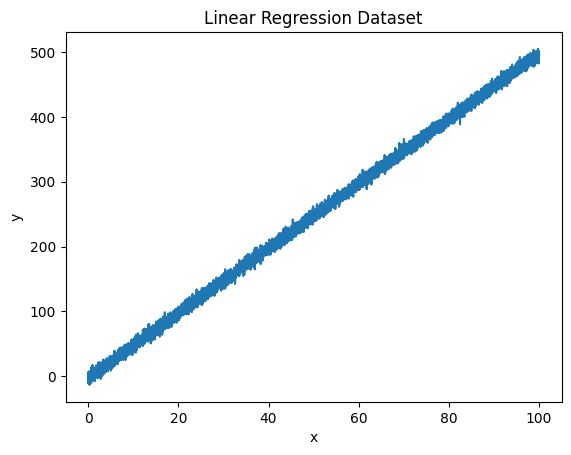

In [7]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x1 = np.linspace(0,100,n_points)
y = a*x1+b

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [8]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [10]:
# Train - Test Split

train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [11]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], cost_function='RMSE', learning_rate=1e-5, num_iterations=10000, print_cost=True)

Cost after iteration 0: 202.9959643694996
Cost after iteration 1000: 3.9498641757606427
Cost after iteration 2000: 3.7145505995324832
Cost after iteration 3000: 3.623592488059219
Cost after iteration 4000: 3.5831697968999388
Cost after iteration 5000: 3.562655974707339
Cost after iteration 6000: 3.5505218688851357
Cost after iteration 7000: 3.5427815291276583
Cost after iteration 8000: 3.5373986790062832
Cost after iteration 9000: 3.5362554313868695
Cost after iteration 9999: 3.535802060829715


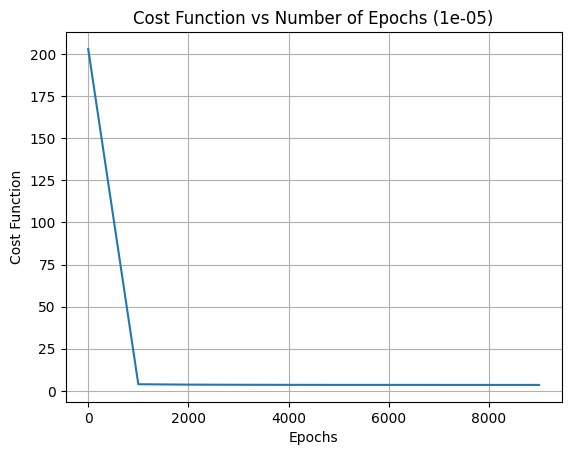

In [12]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, print_cost_function=True)

In [13]:
pred_train = model.predict(train_x, train_y)

RMSE: 3.5358016348749834


In [14]:
pred = model.predict(test_x, test_y)

RMSE: 3.585989470917897


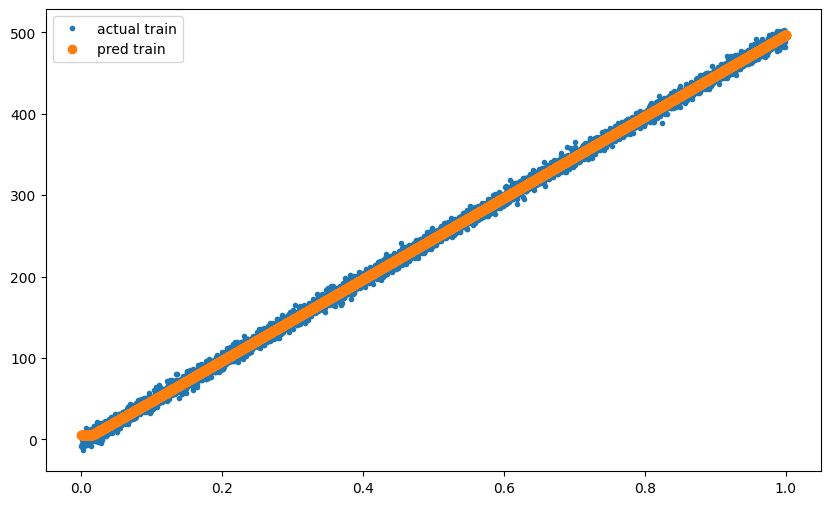

In [15]:
plt.figure(figsize=(10,6))
plt.plot(train_x, train_y, '.', label='actual train')
plt.plot(train_x, pred_train.reshape(-1,1), 'o', label='pred train')
plt.legend();

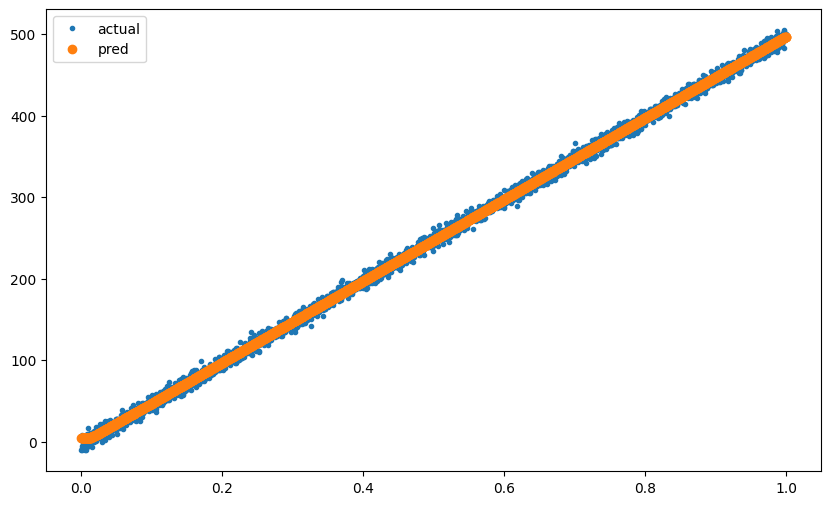

In [16]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.', label='actual')
plt.plot(test_x, pred.reshape(-1,1), 'o', label='pred')
plt.legend();

# Example 2: Multiple Linear Regression

## 1. Import Data

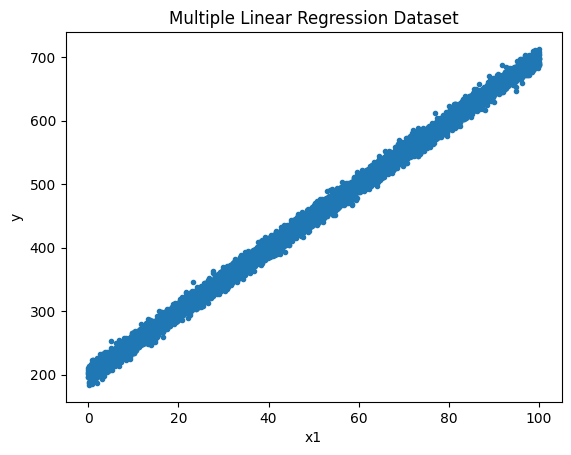

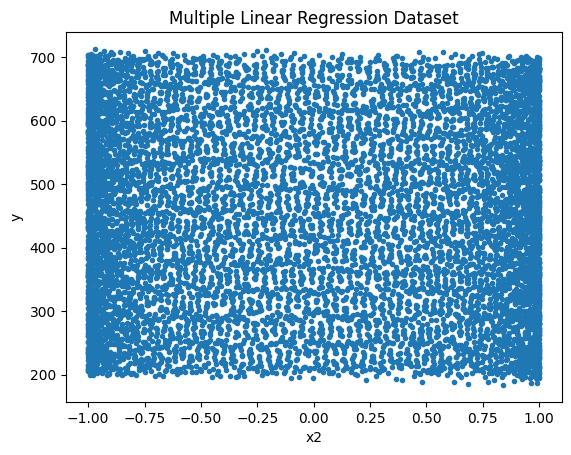

In [18]:
n_points = 10000
a=5
b=-3
c=200
alpha = 0.01

x1 = np.linspace(0,100,n_points)
x2 = np.sin(np.linspace(1250,10526,n_points))

y = a*x1+b*x2+c

white_noise = np.random.randn(n_points)*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1, 'x2':x2})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y, '.')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset')

plt.figure()
plt.plot(x2,y, '.')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset');

## 2. Preprocessing

In [21]:
# Train - Test Split
split_point = int(n_points * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

In [23]:
for col in train_x.columns:
    train_x[col] = min_max_scaler(train_x[col])

# 3. Prediction

In [29]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], cost_function='RMSE', learning_rate=1e-4, num_iterations=30000, print_cost=True)

Cost after iteration 0: 274.6257010756729
Cost after iteration 1000: 250.4870083594145
Cost after iteration 2000: 228.686029331156
Cost after iteration 3000: 209.15200872782847
Cost after iteration 4000: 191.68266423522144
Cost after iteration 5000: 176.0945405309828
Cost after iteration 6000: 162.22079490804418
Cost after iteration 7000: 149.9091306615625
Cost after iteration 8000: 139.0198855513601
Cost after iteration 9000: 129.4242952032398
Cost after iteration 10000: 121.00296189868108
Cost after iteration 11000: 113.64456459498656
Cost after iteration 12000: 107.24484296799032
Cost after iteration 13000: 101.70587482948805
Cost after iteration 14000: 96.93564318212556
Cost after iteration 15000: 92.84786054213495
Cost after iteration 16000: 89.36199074183575
Cost after iteration 17000: 86.40338948139079
Cost after iteration 18000: 83.90347949389655
Cost after iteration 19000: 81.79988527112287
Cost after iteration 20000: 80.03647258406902
Cost after iteration 21000: 78.5632636060

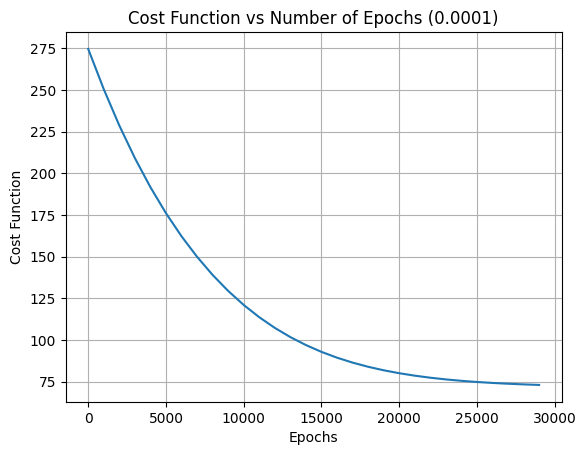

In [30]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, print_cost_function=True)

In [31]:
pred_train = model.predict(train_x, train_y)

RMSE: 72.74161996138098


In [32]:
pred = model.predict(test_x, test_y)

RMSE: 192.565961141654


# Example 3: Fetch California Housing Dataset

## 1. Import Data

In [35]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

## 2. Preprocessing

In [36]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [37]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [96]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 5, 5, 5, 5, 1], cost_function='RMSE', learning_rate=2e-3, num_iterations=25000, print_cost=True)

Cost after iteration 0: 1.6901713681074657
Cost after iteration 1000: 0.8127363300529518
Cost after iteration 2000: 0.8032142439155726
Cost after iteration 3000: 0.7893711832371721
Cost after iteration 4000: 0.7557891236057585
Cost after iteration 5000: 0.6682021919430875
Cost after iteration 6000: 0.5488888136848946
Cost after iteration 7000: 0.518774200464098
Cost after iteration 8000: 0.5121679996320592
Cost after iteration 9000: 0.5093748591197685
Cost after iteration 10000: 0.5078977925550952
Cost after iteration 11000: 0.5069203956460834
Cost after iteration 12000: 0.5061374880231778
Cost after iteration 13000: 0.505467511107576
Cost after iteration 14000: 0.5048737286880187
Cost after iteration 15000: 0.5043427311196846
Cost after iteration 16000: 0.5038586479465108
Cost after iteration 17000: 0.5034097115142413
Cost after iteration 18000: 0.5029890777956402
Cost after iteration 19000: 0.5025955284408424
Cost after iteration 20000: 0.5022240235218192
Cost after iteration 21000: 

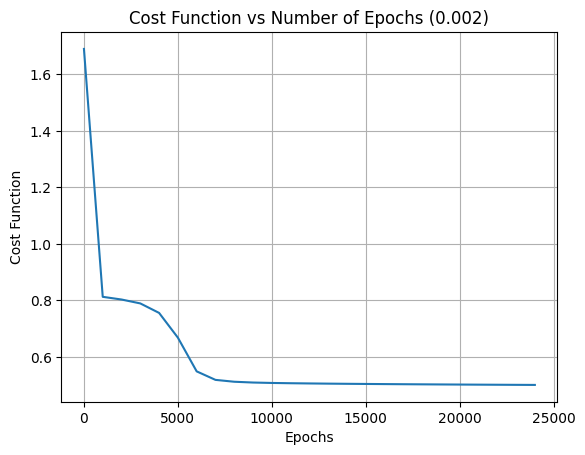

In [97]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, print_cost_function=True)

In [98]:
pred_train = model.predict(train_x, train_y)

RMSE: 2.16041520714472


In [99]:
pred = model.predict(test_x, test_y)

RMSE: 2.156645769067801
